## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

In [2]:
full_data = mouse_metadata.merge(study_results, how="inner")
full_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
sumtable = pd.DataFrame()

sumtable["Mean"] = full_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
sumtable["Median"] = full_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
sumtable["Variance"] = full_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
sumtable["Standard Deviation"] = full_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sumtable["SEM"] = full_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

sumtable

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [4]:
regcount = full_data["Drug Regimen"].value_counts().sort_values(ascending=True)
regcount

Propriva     161
Infubinol    178
Ceftamin     178
Placebo      181
Stelasyn     181
Zoniferol    182
Naftisol     186
Ketapril     188
Ramicane     228
Capomulin    230
Name: Drug Regimen, dtype: int64

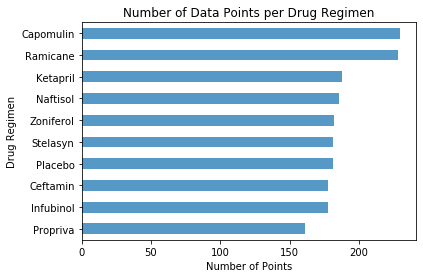

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
bar1 = regcount.plot(kind="barh", alpha=.75)
plt.title("Number of Data Points per Drug Regimen")
plt.ylabel("Drug Regimen")
plt.xlabel("Number of Points")
plt.show()

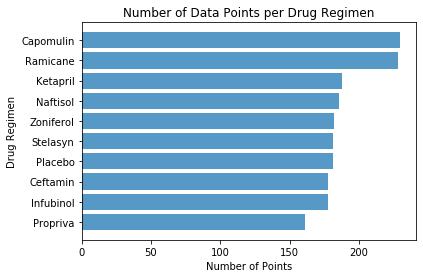

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
bar2 = plt.figure()
names = regcount.index.values
plt.barh(names, regcount, alpha=.75)
plt.title("Number of Data Points per Drug Regimen")
plt.ylabel("Drug Regimen")
plt.xlabel("Number of Points")
plt.show()


## Pie plots

In [7]:
sexcount = full_data["Sex"].value_counts()
sexcount

Male      958
Female    935
Name: Sex, dtype: int64

Text(0, 0.5, '')

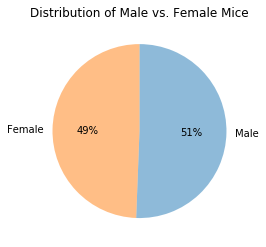

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie1 = sexcount.plot(kind="pie", autopct="%1.0f%%", counterclock=False, startangle=90, wedgeprops={'alpha':0.5})
plt.title("Distribution of Male vs. Female Mice")
plt.ylabel("")

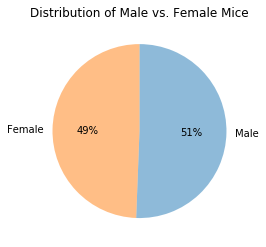

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie2 = plt.figure()
labels = sexcount.index.values
plt.pie(sexcount, labels=labels, autopct="%1.0f%%", counterclock=False, startangle=90, wedgeprops={'alpha':0.5})
plt.title("Distribution of Male vs. Female Mice")
plt.show()

## Quartiles, outliers and boxplots

In [10]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
indeces = full_data.groupby("Mouse ID")["Timepoint"].idxmax()
cond = ((full_data["Drug Regimen"] == "Capomulin") | (full_data["Drug Regimen"] == "Ramicane") | (full_data["Drug Regimen"] == "Infubinol") | (full_data["Drug Regimen"] == "Ceftamin"))
index_data = full_data.loc[indeces]
final_data = index_data.loc[cond]
final_capo_data = final_data.loc[final_data["Drug Regimen"] == "Capomulin"]
final_rami_data = final_data.loc[final_data["Drug Regimen"] == "Ramicane"]
final_infu_data = final_data.loc[final_data["Drug Regimen"] == "Infubinol"]
final_cefta_data = final_data.loc[final_data["Drug Regimen"] == "Ceftamin"]


quartiles = final_data['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outlier_cond = (final_data['Tumor Volume (mm3)'] < lower_bound) | (final_data['Tumor Volume (mm3)'] > upper_bound)
outlier_tumors = final_data.loc[outlier_cond]
print("There are no outliers.")
outlier_tumors #There are no outliers

There are no outliers.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


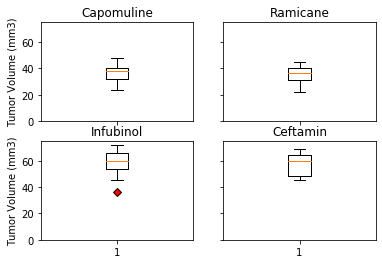

In [11]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
mousefig, axs = plt.subplots(2,2)
outlierformat = dict(markerfacecolor='r', marker='D')
axs[0,0].boxplot(final_capo_data['Tumor Volume (mm3)'], flierprops=outlierformat)
axs[0,0].set_ylim(0, 75)
axs[0,0].set_title("Capomuline")
axs[0,1].boxplot(final_rami_data['Tumor Volume (mm3)'], flierprops=outlierformat)
axs[0,1].set_ylim(0, 75)
axs[0,1].set_title("Ramicane")
axs[1,0].boxplot(final_infu_data['Tumor Volume (mm3)'], flierprops=outlierformat)
axs[1,0].set_ylim(0, 75)
axs[1,0].set_title("Infubinol")
axs[1,1].boxplot(final_cefta_data['Tumor Volume (mm3)'], flierprops=outlierformat)
axs[1,1].set_ylim(0, 75)
axs[1,1].set_title("Ceftamin")

for ax in axs.flat:
    ax.set(ylabel='Tumor Volume (mm3)')
    
for ax in axs.flat:
    ax.label_outer()
    
plt.show()

## Line and scatter plots

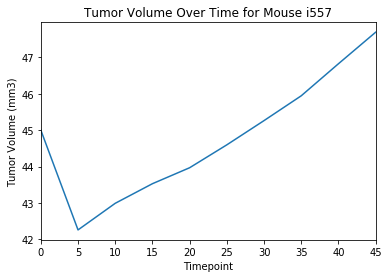

In [12]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouseid = "i557"
mouseframe = full_data.loc[full_data['Mouse ID'] == mouseid]
mouseframe.plot(kind="line", x='Timepoint', y='Tumor Volume (mm3)', title=f"Tumor Volume Over Time for Mouse {mouseid}", legend=False)
plt.ylabel("Tumor Volume (mm3)")
plt.show()

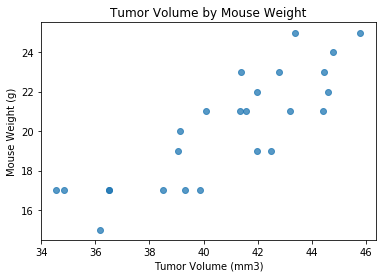

In [13]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capodata = full_data.loc[full_data['Drug Regimen'] == "Capomulin"]
avgTumorVol = capodata.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouseWeight = capodata.groupby("Mouse ID")["Weight (g)"].mean()
mouseScatter = plt.figure()
plt.scatter(avgTumorVol, mouseWeight, alpha=.75)
plt.title("Tumor Volume by Mouse Weight")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Mouse Weight (g)")
plt.show()

In [19]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avgTumorVol, mouseWeight)[0]
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(correlation, 2)}")


The correlation coefficient between mouse weight and average tumor volume is 0.84


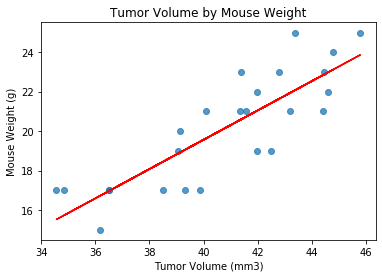

In [24]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avgTumorVol, mouseWeight)

regress_values = avgTumorVol * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))

regressionScatter = plt.figure()
plt.scatter(avgTumorVol, mouseWeight, alpha=.75)
plt.plot(avgTumorVol,regress_values,"r-")
plt.annotate(line_eq,(10, 0),fontsize=15,color="red")
plt.title("Tumor Volume by Mouse Weight")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Mouse Weight (g)")
plt.show()